https://www.esrl.noaa.gov/psd/data/gridded/data.ncep.reanalysis.surface.html

In [42]:
from netCDF4 import Dataset
import pandas as pd
%matplotlib inline
import matplotlib
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

Surface Air Temp

https://www.esrl.noaa.gov/psd/cgi-bin/db_search/DBSearch.pl?Dataset=NCEP+Reanalysis+Daily+Averages&Variable=Air+Temperature&group=0&submit=Search

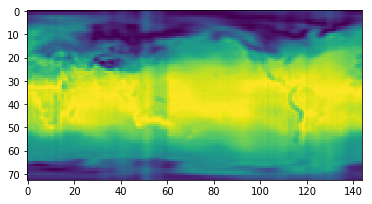

In [43]:
data = Dataset("C:/Users/zdunkerton/Downloads/air.sig995.2017.nc", "r")
temp = data.variables['air'][10]
temp = scaler.fit_transform(test)
imgplot = plt.imshow(temp)
plt.show()

Surface Pressure 

https://www.esrl.noaa.gov/psd/cgi-bin/db_search/DBSearch.pl?Dataset=NCEP+Reanalysis+Daily+Averages&Variable=Pressure&group=0&submit=Search

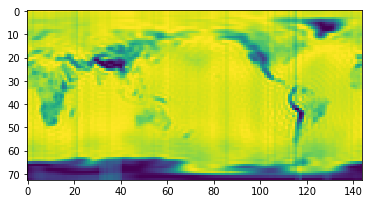

In [44]:
data = Dataset("C:/Users/zdunkerton/Downloads/pres.sfc.2017.nc", "r")
pres = data.variables['pres'][10]
pres = scaler.fit_transform(pres)
imgplot = plt.imshow(pres)
plt.show()

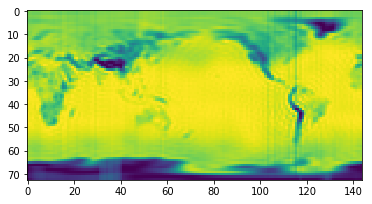

In [50]:
test = pres*4 + temp
test = scaler.fit_transform(test)
imgplot = plt.imshow(test)
plt.show()